In [0]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [0]:
import pandas_datareader as pdr

start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2020-05-09')

spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

spy

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.255348
...,...,...,...,...,...,...
2020-05-04,283.899994,279.130005,280.739990,283.570007,80873200.0,283.570007
2020-05-05,289.250000,283.709991,286.640015,286.190002,79569900.0,286.190002
2020-05-06,288.459991,283.779999,288.040009,284.250000,73632600.0,284.250000


In [0]:
spy.to_csv('SPY.csv')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
spy=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python-Machine-Learning-Blueprints-Second-Edition/Chapter07/SPY.xls')
spy.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2601,2020-05-04,283.899994,279.130005,280.739990,283.570007,80873200.0,283.570007
2602,2020-05-05,289.250000,283.709991,286.640015,286.190002,79569900.0,286.190002
2603,2020-05-06,288.459991,283.779999,288.040009,284.250000,73632600.0,284.250000
2604,2020-05-07,289.779999,287.130005,287.750000,287.679993,75250400.0,287.679993
2605,2020-05-08,292.950012,289.859985,291.089996,292.440002,76452400.0,292.440002


In [0]:
spy.shape

(2606, 7)

In [0]:
spy_c = spy['Close']

In [0]:
spy_c.head()

0    111.440002
1    113.330002
2    113.629997
3    113.709999
4    114.190002
Name: Close, dtype: float64

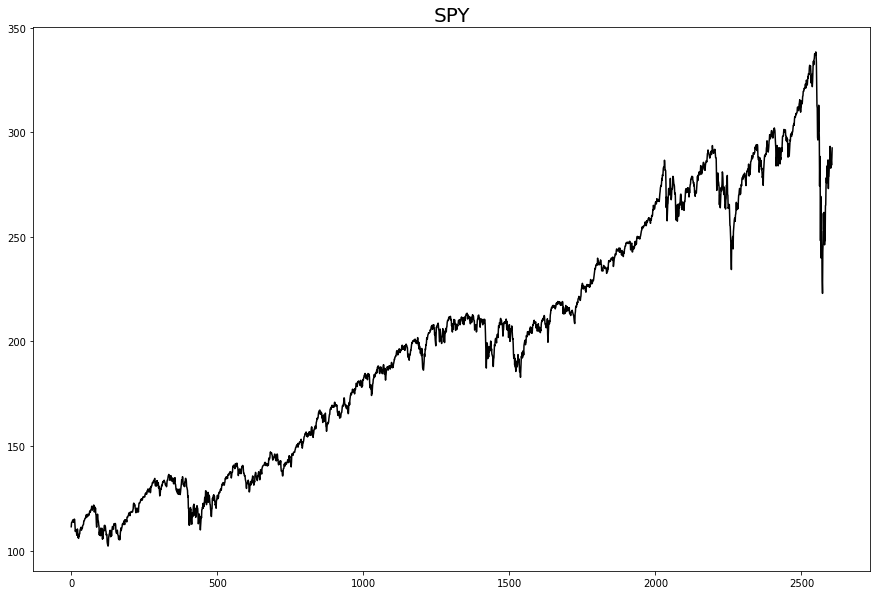

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
spy_c.plot(color='k')
plt.title("SPY", fontsize=20);

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


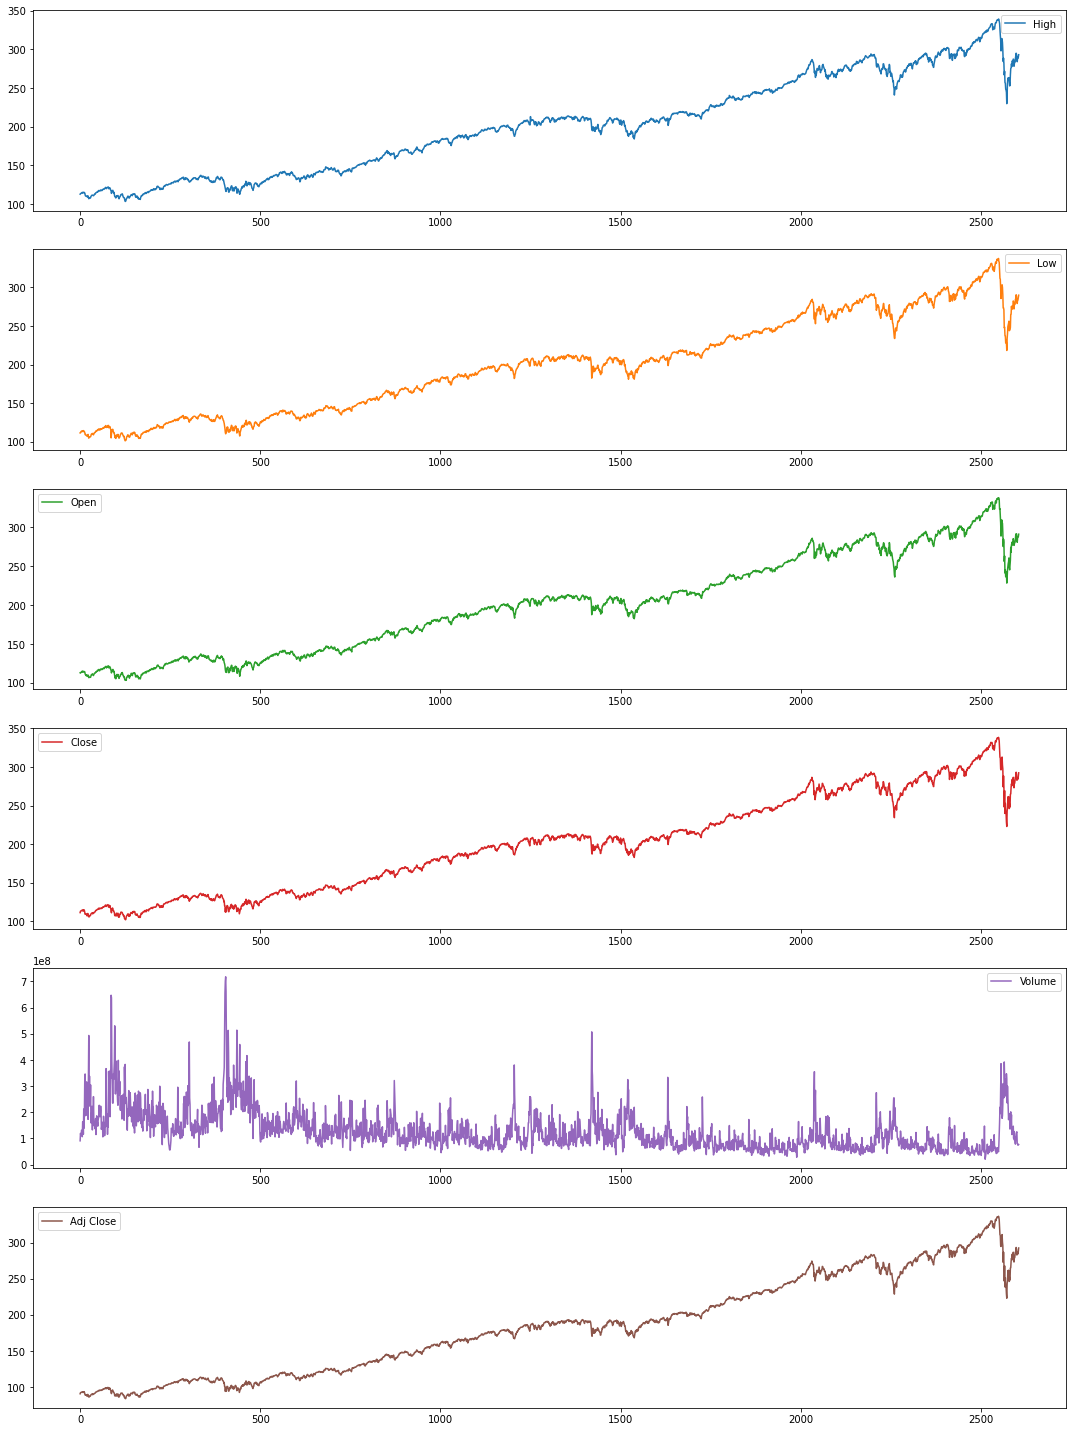

In [0]:
fig,ax=plt.subplots(figsize=(15,20))
spy.plot(subplots=True,ax=ax)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=20)
plt.tight_layout()

In [0]:
first_open = spy['Open'].iloc[0]
first_open

112.7699966430664

In [0]:
last_close = spy['Close'].iloc[-1]
last_close

292.44000244140625

In [0]:
last_close - first_open

179.67000579833984

In [0]:
spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open'])

In [0]:
spy['Daily Change']

0      -1.329994
1       0.959999
2       0.369995
3       0.190002
4       0.690002
          ...   
2601    2.830017
2602   -0.450012
2603   -3.790009
2604   -0.070007
2605    1.350006
Name: Daily Change, Length: 2606, dtype: float64

In [0]:
spy['Daily Change'].sum()

90.21967315673822

In [0]:
np.std(spy['Daily Change'])

1.5775247235342376

In [0]:
spy['Overnight Change'] = pd.Series(spy['Open'] - spy['Close'].shift(1))

In [0]:
spy['Open'].head()

0    112.769997
1    112.370003
2    113.260002
3    113.519997
4    113.500000
Name: Open, dtype: float64

In [0]:
spy['Close'].shift(1).head()

0           NaN
1    111.440002
2    113.330002
3    113.629997
4    113.709999
Name: Close, dtype: float64

In [0]:
spy['Overnight Change']

0            NaN
1       0.930000
2      -0.070000
3      -0.110001
4      -0.209999
          ...   
2601   -2.050018
2602    3.070007
2603    1.850006
2604    3.500000
2605    3.410004
Name: Overnight Change, Length: 2606, dtype: float64

In [0]:
spy['Overnight Change'].sum()

89.45033264160162

In [0]:
np.std(spy['Overnight Change'])

1.5628694239958127

In [0]:
spy[spy['Daily Change']<0]['Daily Change'].mean()

-1.0812417187102856

In [0]:
spy[spy['Overnight Change']<0]['Overnight Change'].mean()

-0.8826480594167571

In [0]:
# daily returns
daily_rtn = ((spy['Close'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
daily_rtn

0            NaN
1       1.695979
2       0.264710
3       0.070406
4       0.422129
          ...   
2601    0.275823
2602    0.923932
2603   -0.677872
2604    1.206682
2605    1.654620
Name: Close, Length: 2606, dtype: float64

In [0]:
np.log(spy['Close']).diff() 

0            NaN
1       0.016818
2       0.002644
3       0.000704
4       0.004212
          ...   
2601    0.002754
2602    0.009197
2603   -0.006802
2604    0.011995
2605    0.016411
Name: Close, Length: 2606, dtype: float64

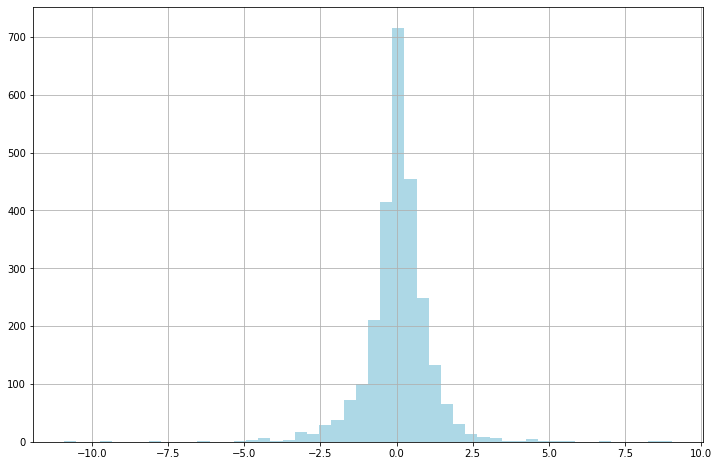

In [0]:
daily_rtn.hist(bins=50, color='lightblue', figsize=(12,8));

In [0]:
# intra day returns
id_rtn = ((spy['Close'] - spy['Open'])/spy['Open'])*100
id_rtn

0      -1.179387
1       0.854320
2       0.326678
3       0.167374
4       0.607932
          ...   
2601    1.008056
2602   -0.156996
2603   -1.315792
2604   -0.024329
2605    0.463776
Length: 2606, dtype: float64

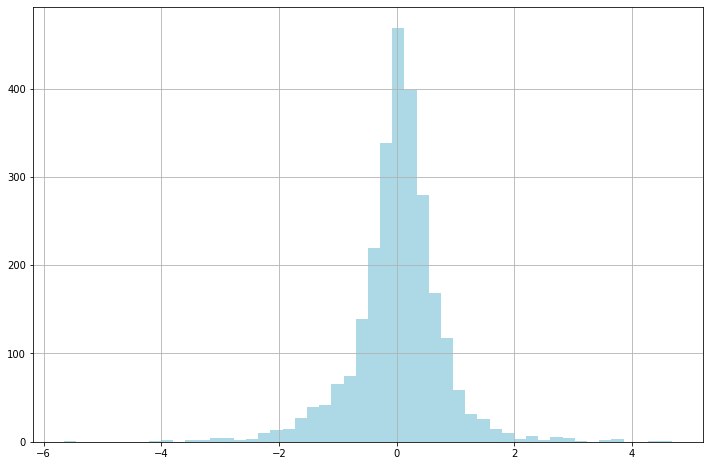

In [0]:
id_rtn.hist(bins=50, color='lightblue', figsize=(12,8));

In [0]:
# overnight returns
on_rtn = ((spy['Open'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100
on_rtn

0            NaN
1       0.834530
2      -0.061766
3      -0.096806
4      -0.184680
          ...   
2601   -0.724926
2602    1.082628
2603    0.646426
2604    1.231310
2605    1.185346
Length: 2606, dtype: float64

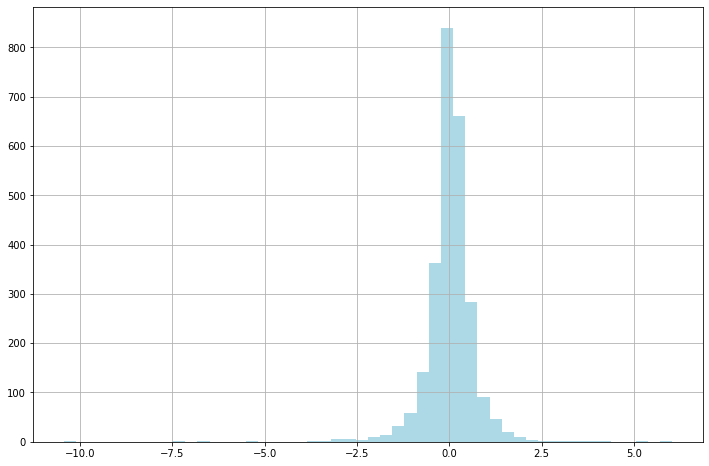

In [0]:
on_rtn.hist(bins=50, color='lightblue', figsize=(12,8));

In [0]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print('Trades:', cnt,\
          '\nWins:', wins,\
          '\nLosses:', losses,\
          '\nBreakeven:', evens,\
          '\nWin/Loss Ratio', win_r,\
          '\nMean Win:', mean_w,\
          '\nMean Loss:', mean_l,\
          '\nMean', mean_trd,\
          '\nStd Dev:', sd,\
          '\nMax Loss:', max_l,\
          '\nMax Win:', max_w,\
          '\nSharpe Ratio:', sharpe_r)

In [0]:
get_stats(daily_rtn)

Trades: 2605 
Wins: 1430 
Losses: 1165 
Breakeven: 10 
Win/Loss Ratio 1.227 
Mean Win: 0.669 
Mean Loss: -0.725 
Mean 0.043 
Std Dev: 1.084 
Max Loss: -10.942 
Max Win: 9.06 
Sharpe Ratio: 0.6289


In [0]:
import random 
def get_stats_df(s, n=252):
    n=252
    i=random.randrange(1000) 
    s=s.dropna()
    Parameter= ['Trades','Win','losses','Breakeven','Win/Loss Ratio','Mean Win:','Mean Loss:',
                    'Mean','Std Dev:','Max Loss:', 'Max Win:','Sharpe Ratio:']
    Value = [len(s),len(s[s>0]),len(s[s<0]),len(s[s==0]),round(len(s[s>0])/len(s[s<0]), 3),
            round(s[s>0].mean(), 3),round(s[s<0].mean(), 3),round(s.mean(), 3),round(np.std(s), 3),
            round(s.min(), 3),round(s.max(), 3),round((s.mean()/np.std(s))*np.sqrt(n), 4)]
    data = list(zip(Parameter, Value))  
    df = pd.DataFrame(data,columns=['Parameter','Value'+str(i)])
    return df

In [0]:
get_stats_df(daily_rtn)

,Parameter,Value183
0,Trades,2605.0000
1,Win,1430.0000
2,losses,1165.0000
3,Breakeven,10.0000
4,Win/Loss Ratio,1.2270
5,Mean Win:,0.6690
6,Mean Loss:,-0.7250
7,Mean,0.0430
8,Std Dev:,1.0840
9,Max Loss:,-10.9420


In [0]:
compare_df=pd.concat([get_stats_df(daily_rtn),
                      get_stats_df(id_rtn),
                      get_stats_df(on_rtn)],
                     axis=1)
compare_df

,Parameter,Value160,Parameter,Value543,Parameter,Value912
0,Trades,2605.0000,Trades,2606.0000,Trades,2605.0000
1,Win,1430.0000,Win,1419.0000,Win,1406.0000
2,losses,1165.0000,losses,1168.0000,losses,1167.0000
3,Breakeven,10.0000,Breakeven,19.0000,Breakeven,32.0000
4,Win/Loss Ratio,1.2270,Win/Loss Ratio,1.2150,Win/Loss Ratio,1.2050
5,Mean Win:,0.6690,Mean Win:,0.4960,Mean Win:,0.4070
6,Mean Loss:,-0.7250,Mean Loss:,-0.5540,Mean Loss:,-0.4460
7,Mean,0.0430,Mean,0.0220,Mean,0.0200
8,Std Dev:,1.0840,Std Dev:,0.7650,Std Dev:,0.7050
9,Max Loss:,-10.9420,Max Loss:,-5.6610,Max Loss:,-10.4490


In [0]:
compare_df.columns

Index(['Parameter', 'Value160', 'Parameter', 'Value543', 'Parameter',
       'Value912'],
      dtype='object')

In [0]:
compare_df.rename(columns={ compare_df.columns[1]: "daily_rtn",
                  compare_df.columns[3]: "id_rtn",
                  compare_df.columns[5]: "on_rtn"}, 
                  inplace = True)
compare_df

,Parameter,daily_rtn,Parameter,id_rtn,Parameter,on_rtn
0,Trades,2605.0000,Trades,2606.0000,Trades,2605.0000
1,Win,1430.0000,Win,1419.0000,Win,1406.0000
2,losses,1165.0000,losses,1168.0000,losses,1167.0000
3,Breakeven,10.0000,Breakeven,19.0000,Breakeven,32.0000
4,Win/Loss Ratio,1.2270,Win/Loss Ratio,1.2150,Win/Loss Ratio,1.2050
5,Mean Win:,0.6690,Mean Win:,0.4960,Mean Win:,0.4070
6,Mean Loss:,-0.7250,Mean Loss:,-0.5540,Mean Loss:,-0.4460
7,Mean,0.0430,Mean,0.0220,Mean,0.0200
8,Std Dev:,1.0840,Std Dev:,0.7650,Std Dev:,0.7050
9,Max Loss:,-10.9420,Max Loss:,-5.6610,Max Loss:,-10.4490


In [0]:
def get_signal(x):
    val = np.random.rand()
    if val > .5:
        return 1
    else:
        return 0

In [0]:
for i in range(5000):
    spy['Signal_' + str(i)] = spy.apply(get_signal, axis=1)

In [0]:
spy.to_csv('/content/drive/My Drive/Colab Notebooks/Python-Machine-Learning-Blueprints-Second-Edition/Chapter07/SPYfeature.xls')

In [0]:
spy=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python-Machine-Learning-Blueprints-Second-Edition/Chapter07/SPYfeature.xls')


In [0]:
spy.drop(columns='Unnamed: 0',inplace=True)
spy

,Date,High,Low,Open,Close,Volume,Adj Close,Daily Change,Overnight Change,Signal_0,Signal_1,Signal_2,Signal_3,Signal_4,Signal_5,Signal_6,Signal_7,Signal_8,Signal_9,Signal_10,Signal_11,Signal_12,Signal_13,Signal_14,Signal_15,Signal_16,Signal_17,Signal_18,Signal_19,Signal_20,Signal_21,Signal_22,Signal_23,Signal_24,Signal_25,Signal_26,Signal_27,Signal_28,Signal_29,Signal_30,...,Signal_4960,Signal_4961,Signal_4962,Signal_4963,Signal_4964,Signal_4965,Signal_4966,Signal_4967,Signal_4968,Signal_4969,Signal_4970,Signal_4971,Signal_4972,Signal_4973,Signal_4974,Signal_4975,Signal_4976,Signal_4977,Signal_4978,Signal_4979,Signal_4980,Signal_4981,Signal_4982,Signal_4983,Signal_4984,Signal_4985,Signal_4986,Signal_4987,Signal_4988,Signal_4989,Signal_4990,Signal_4991,Signal_4992,Signal_4993,Signal_4994,Signal_4995,Signal_4996,Signal_4997,Signal_4998,Signal_4999
0,2009-12-31,112.800003,111.389999,112.769997,111.440002,90637900.0,90.707649,-1.329994,NaN,1,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,...,0,0,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,0,1,0,1,1
1,2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048,0.959999,0.930000,1,1,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,...,1,1,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,1
2,2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204,0.369995,-0.070000,0,1,1,1,1,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,...,0,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1
3,2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328,0.190002,-0.110001,0,1,1,0,1,1,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1
4,2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060,0.690002,-0.209999,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,...,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,2020-05-04,283.899994,279.130005,280.739990,283.570007,80873200.0,283.570007,2.830017,-2.050018,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,1,1,0
2602,2020-05-05,289.250000,283.709991,286.640015,286.190002,79569900.0,286.190002,-0.450012,3.070007,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1
2603,2020-05-06,288.459991,283.779999,288.040009,284.250000,73632600.0,284.250000,-3.790009,1.850006,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,0,0,1
2604,2020-05-07,289.779999,287.130005,287.750000,287.679993,75250400.0,287.679993,-0.070007,3.500000,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,1


In [0]:
#spy.drop([x for x in spy.columns if 'Signal' in x], axis=1)

In [0]:
sumd={}
for i in range(5000):
    sumd.update({i: np.where(spy['Signal_' + str(i)].iloc[1:]==1, spy['Overnight Change'].iloc[1:],0).sum()})

In [0]:
returns = pd.Series(sumd).to_frame('return').sort_values('return', ascending=0)

In [0]:
returns

,return
2747,177.330391
823,175.610374
2801,174.470230
2486,173.500267
2966,166.930435
...,...
939,-78.329987
3119,-83.139687
2946,-91.159668
2410,-93.809906


In [0]:
mystery_rtn = pd.Series(np.where(spy['Signal_1592'].iloc[1:]==1,spy['Overnight Change'].iloc[1:],0))

In [0]:
get_stats(mystery_rtn)

Trades: 2605 
Wins: 716 
Losses: 542 
Breakeven: 1347 
Win/Loss Ratio 1.321 
Mean Win: 0.843 
Mean Loss: -0.884 
Mean 0.048 
Std Dev: 0.978 
Max Loss: -10.34 
Max Win: 11.47 
Sharpe Ratio: 0.7754


In [0]:
import pandas_datareader as pdr

In [0]:
start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2018-12-01')

sp = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

In [0]:
sp

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,99.394493
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,95.507530
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,95.678391
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,94.140717
2000-01-07,145.750000,140.062500,140.312500,145.750000,8066500.0,99.608055
...,...,...,...,...,...,...
2018-11-26,267.750000,265.339996,265.779999,267.500000,79981400.0,259.478821
2018-11-27,268.399994,265.660004,266.339996,268.399994,75502400.0,260.351807
2018-11-28,274.579987,268.329987,269.600006,274.579987,127629600.0,266.346466


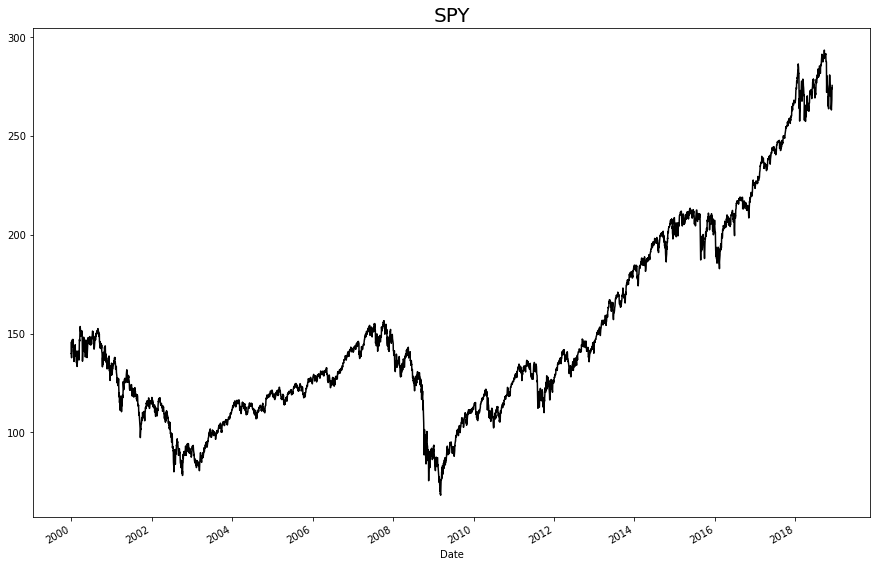

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
sp['Close'].plot(color='k')
plt.title("SPY", fontsize=20);

In [0]:
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [0]:
(sp['Close'] - sp['Close'].shift(1)).sum()

130.21249389648438

In [0]:
get_stats(long_day_rtn)

Trades: 4759 
Wins: 2550 
Losses: 2190 
Breakeven: 19 
Win/Loss Ratio 1.164 
Mean Win: 0.77 
Mean Loss: -0.851 
Mean 0.021 
Std Dev: 1.21 
Max Loss: -9.845 
Max Win: 14.52 
Sharpe Ratio: 0.2722


In [0]:
long_id_rtn = ((sp['Close'] - sp['Open'])/sp['Open'])*100

In [0]:
(sp['Close'] - sp['Open']).sum()

-13.87054443359375

In [0]:
get_stats(long_id_rtn)

Trades: 4760 
Wins: 2502 
Losses: 2222 
Breakeven: 36 
Win/Loss Ratio 1.126 
Mean Win: 0.642 
Mean Loss: -0.717 
Mean 0.003 
Std Dev: 1.0 
Max Loss: -8.991 
Max Win: 8.435 
Sharpe Ratio: 0.041


In [0]:
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [0]:
(sp['Open'] - sp['Close'].shift(1)).sum()

141.27053833007812

In [0]:
get_stats(long_on_rtn)

Trades: 4759 
Wins: 2531 
Losses: 2171 
Breakeven: 57 
Win/Loss Ratio 1.166 
Mean Win: 0.413 
Mean Loss: -0.443 
Mean 0.018 
Std Dev: 0.661 
Max Loss: -8.322 
Max Win: 6.068 
Sharpe Ratio: 0.424


In [0]:
for i in range(1, 21, 1):
    sp.loc[:,'Close Minus ' + str(i)] = sp['Close'].shift(i)

In [0]:
sp

,High,Low,Open,Close,Volume,Adj Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,Close Minus 10,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,99.394493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,95.507530,145.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,95.678391,139.750000,145.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,94.140717,140.000000,139.750000,145.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,145.750000,140.062500,140.312500,145.750000,8066500.0,99.608055,137.750000,140.000000,139.750000,145.437500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,267.750000,265.339996,265.779999,267.500000,79981400.0,259.478821,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985,265.329987
2018-11-27,268.399994,265.660004,266.339996,268.399994,75502400.0,260.351807,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985
2018-11-28,274.579987,268.329987,269.600006,274.579987,127629600.0,266.346466,268.399994,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989


In [0]:
sp20 = sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,]

In [0]:
sp20

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,Close Minus 10,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
2000-02-07,142.375000,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985,265.329987
2018-11-27,268.399994,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989,263.859985
2018-11-28,274.579987,268.399994,267.500000,263.250000,265.019989,264.119995,269.100006,273.730011,273.019989,270.200012,272.059998,272.570007,277.760010,280.500000,281.010010,275.119995,273.390015,271.890015,273.510010,270.630005,267.769989


In [0]:
sp20 = sp20.iloc[:,::-1]

In [0]:
sp20

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,Close Minus 10,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500
2000-02-02,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500
2000-02-03,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500
2000-02-04,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750
2000-02-07,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750,142.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,265.329987,263.859985,267.769989,270.630005,273.510010,271.890015,273.390015,275.119995,281.010010,280.500000,277.760010,272.570007,272.059998,270.200012,273.019989,273.730011,269.100006,264.119995,265.019989,263.250000,267.500000
2018-11-27,263.859985,267.769989,270.630005,273.510010,271.890015,273.390015,275.119995,281.010010,280.500000,277.760010,272.570007,272.059998,270.200012,273.019989,273.730011,269.100006,264.119995,265.019989,263.250000,267.500000,268.399994
2018-11-28,267.769989,270.630005,273.510010,271.890015,273.390015,275.119995,281.010010,280.500000,277.760010,272.570007,272.059998,270.200012,273.019989,273.730011,269.100006,264.119995,265.019989,263.250000,267.500000,268.399994,274.579987


In [0]:
from sklearn.svm import SVR

In [0]:
clf = SVR(kernel='linear')

In [0]:
len(sp20)

4740

In [0]:
X_train = sp20[:-2000]
y_train = sp20['Close'].shift(-1)[:-2000]

In [0]:
X_train

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,Close Minus 10,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500
2000-02-02,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500
2000-02-03,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500
2000-02-04,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750
2000-02-07,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750,142.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-15,118.160004,118.220001,119.959999,120.290001,120.190002,118.449997,120.199997,118.800003,119.160004,118.489998,121.010002,122.559998,122.889999,122.760002,122.830002,123.279999,123.760002,124.480003,124.559998,124.669998,124.099998
2010-12-16,118.220001,119.959999,120.290001,120.190002,118.449997,120.199997,118.800003,119.160004,118.489998,121.010002,122.559998,122.889999,122.760002,122.830002,123.279999,123.760002,124.480003,124.559998,124.669998,124.099998,124.820000
2010-12-17,119.959999,120.290001,120.190002,118.449997,120.199997,118.800003,119.160004,118.489998,121.010002,122.559998,122.889999,122.760002,122.830002,123.279999,123.760002,124.480003,124.559998,124.669998,124.099998,124.820000,124.300003


In [0]:
y_train #based on 20 past clost value to forecast close value this day

Date
2000-02-01    141.062500
2000-02-02    143.187500
2000-02-03    142.593750
2000-02-04    142.375000
2000-02-07    144.312500
                 ...    
2010-12-15    124.820000
2010-12-16    124.300003
2010-12-17    124.599998
2010-12-20    125.389999
2010-12-21    125.779999
Name: Close, Length: 2740, dtype: float64

In [0]:
X_test = sp20[-2000:]
y_test = sp20['Close'].shift(-1)[-2000:]

In [0]:
model = clf.fit(X_train, y_train)

In [0]:
preds = model.predict(X_test)

In [0]:
preds

array([125.79637344, 125.87088823, 125.68263926, ..., 274.28171821,
       273.86352414, 275.67117279])

In [0]:
len(preds)

2000

In [0]:
tf = pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close', 'Predicted Next Close'], index=y_test.index)

In [0]:
tf

,Next Day Close,Predicted Next Close
Date,,
2010-12-22,125.599998,125.796373
2010-12-23,125.650002,125.870888
2010-12-27,125.830002,125.682639
2010-12-28,125.919998,125.864078
2010-12-29,125.720001,125.892762
...,...,...
2018-11-26,268.399994,267.498317
2018-11-27,274.579987,267.974248
2018-11-28,273.980011,274.281718


In [0]:
cdc = sp[['Close']].iloc[-2000:]
ndo = sp[['Open']].iloc[-2000:].shift(-1)

In [0]:
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

In [0]:
tf2
#Let's now look at the performance of our model. We're going to buy the next
#day's open if the close is predicted to be higher than the open. We'll then sell
#at the close that same day. So wait until next day open to see if predicted next clos
#is higher than next day open

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2010-12-22,125.599998,125.796373,125.779999,125.639999
2010-12-23,125.650002,125.870888,125.599998,125.129997
2010-12-27,125.830002,125.682639,125.650002,125.900002
2010-12-28,125.919998,125.864078,125.830002,125.980003
2010-12-29,125.720001,125.892762,125.919998,125.800003
...,...,...,...,...
2018-11-26,268.399994,267.498317,267.500000,266.339996
2018-11-27,274.579987,267.974248,268.399994,269.600006
2018-11-28,273.980011,274.281718,274.579987,273.709991


In [0]:
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open']:
        return 0 # Need to buy
    else:
        return 1 # No need to buy

In [0]:
def get_ret(r):
    if r['Signal'] == 1: 
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else:
        return 0

In [0]:
# The assign() function is used to assign new columns to a DataFrame
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1)) #apply function to dataframe
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1)) #apply function to df with column name

In [0]:
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2010-12-22,125.599998,125.796373,125.779999,125.639999,0,0.000000
2010-12-23,125.650002,125.870888,125.599998,125.129997,0,0.000000
2010-12-27,125.830002,125.682639,125.650002,125.900002,1,-0.055599
2010-12-28,125.919998,125.864078,125.830002,125.980003,1,-0.047631
2010-12-29,125.720001,125.892762,125.919998,125.800003,0,0.000000
...,...,...,...,...,...,...
2018-11-26,268.399994,267.498317,267.500000,266.339996,0,0.000000
2018-11-27,274.579987,267.974248,268.399994,269.600006,1,1.847174
2018-11-28,273.980011,274.281718,274.579987,273.709991,0,0.000000


In [0]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

NameError: ignored

In [0]:
(sp['Close'].iloc[-2000:] - sp['Open'].iloc[-2000:]).sum()

58.98988342285156

In [0]:
get_stats((sp['Close'].iloc[-2000:] - sp['Open'].iloc[-2000:])/sp['Open'].iloc[-2000:] * 100)

Trades: 2000 
Wins: 1086 
Losses: 899 
Breakeven: 15 
Win/Loss Ratio 1.208 
Mean Win: 0.461 
Mean Loss: -0.512 
Mean 0.02 
Std Dev: 0.695 
Max Loss: -4.175 
Max Win: 3.683 
Sharpe Ratio: 0.4576


In [0]:
get_stats(tf2['PnL'])

Trades: 1999 
Wins: 989 
Losses: 800 
Breakeven: 210 
Win/Loss Ratio 1.236 
Mean Win: 0.43 
Mean Loss: -0.475 
Mean 0.023 
Std Dev: 0.607 
Max Loss: -4.175 
Max Win: 3.594 
Sharpe Ratio: 0.598


In [0]:
#!pip install fastdtw

In [0]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

def dtw_dist(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

In [0]:
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))

In [0]:
len(tseries)

951

In [0]:
tseries[0]

(array([-3.91061453,  0.17889088, -1.60714286,  5.8076225 ]),
 0.34305317324185847)

In [0]:
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))

In [0]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])

In [0]:
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)

In [0]:
sfe = sf[sf['A']<sf['B']]

In [0]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]

In [0]:
winf

,A,B,Dist,A Ret,B Ret
3868,4,69,0.778630,1.360843,-1.696072
3995,4,196,0.608312,1.360843,0.410596
4165,4,366,0.973128,1.360843,0.040522
4346,4,547,0.832545,1.360843,-1.447712
4447,4,648,0.548848,1.360843,-0.510458
...,...,...,...,...,...
882529,928,930,0.864277,0.170599,0.815796
882538,928,939,0.795866,0.170599,-0.194336
884434,930,935,0.793558,0.815796,-0.136616
884436,930,937,0.604233,0.815796,-0.132790


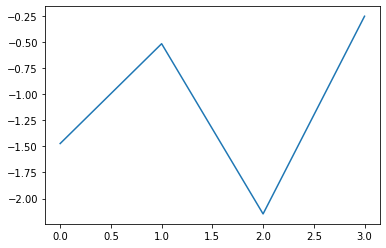

In [0]:
plt.plot(np.arange(4), tseries[6][0]);

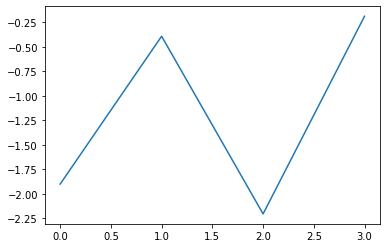

In [0]:
plt.plot(np.arange(4), tseries[598][0]);

In [0]:
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})

In [0]:
winf.apply(get_returns, axis=1);

In [0]:
get_stats(pd.Series(return_list))

Trades: 721 
Wins: 434 
Losses: 284 
Breakeven: 3 
Win/Loss Ratio 1.528 
Mean Win: 0.564 
Mean Loss: -0.602 
Mean 0.102 
Std Dev: 0.791 
Max Loss: -3.591 
Max Win: 3.454 
Sharpe Ratio: 2.0504
